<a href="https://colab.research.google.com/github/abhik2415/ml_iit/blob/master/Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an important assignment.

Take some time to undrstand the classic MNIST dataset here.
http://yann.lecun.com/exdb/mnist/

In this, we will use the copy of the MNIST dataset already provided in tensorflow package in an easy to access form. But we will not use tensorflow for designing the neural network. We will use that from next assignment. In this assisgnment, we will program a neural network from scratch.






In [0]:
import tensorflow as tf; 
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
mnist = tf.keras.datasets.mnist;

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [0]:
#Reshape all images into single rows
X = x_train.reshape(60000,784)
y = y_train;

In [0]:

#Let's look at the first row now
X[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

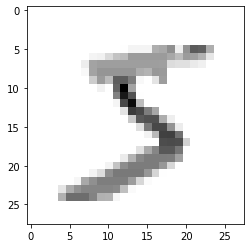

In [0]:
#Let's look at the image that corresponds to the first row of X
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [0]:
a= X.shape

input_layer_size  = a[1];  # 28x28 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 0 to 9
lambd = 2;
alpha = 2;

In [0]:
theta1 = np.zeros([input_layer_size+1, hidden_layer_size]);
theta2 = np.zeros([hidden_layer_size+1, num_labels]);

In [0]:
epsilon_init = 0.1;
theta1 = np.random.uniform(low=0, high=1, size=(input_layer_size+1, hidden_layer_size)) * 2 * epsilon_init - epsilon_init;

epsilon_init = 0.1;
theta2 = np.random.uniform(low=0, high=1, size=(hidden_layer_size+1, num_labels)) * 2 * epsilon_init - epsilon_init;

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x)) 

In [0]:
def sigmoidGradient(z):
  s  = 1/(1+np.exp(-z));
  return s*(1-s);

In [0]:
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), X), axis = 1),theta1);

In [0]:
first_Layer_Output = sigmoid(Z1);

In [0]:
a= first_Layer_Output.shape
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);
second_Layer_Output = sigmoid(Z2);
second_Layer_Output.shape

(60000, 10)

In [0]:
YMat = np.zeros(second_Layer_Output.shape);
a = second_Layer_Output.shape;

In [0]:
YMat.shape

(60000, 10)

In [0]:
for i in range(0,a[0]):
    YMat[i, y[i]] = 1;

In [0]:
YMat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

**Assignment 7.1 (2 marks)**

Comment the following blocks of code in detail

In [0]:
no_of_Interations = 100;
J = np.zeros([no_of_Interations,1]);

for i in range(0,no_of_Interations):
  a= X.shape;
  Z1 = np.dot(np.concatenate((np.ones([a[0],1]), X), axis = 1),theta1);
  first_Layer_Output = sigmoid(Z1);

  a= first_Layer_Output.shape
  Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);
  second_Layer_Output = sigmoid(Z2);
  
  J[i] = (-1/a[1])*np.sum(YMat*np.log(second_Layer_Output) + (1-YMat)*np.log(1-second_Layer_Output)) + (lambd/(2*a[1]))*np.sum(theta1[1:,:]*theta1[1:,:]) + (lambd/(2*a[1]))*np.sum(theta2[1:,:]*theta2[1:,:]);

  da2dz2 = (second_Layer_Output - YMat);
  da1dz1 = da2dz2.dot(np.transpose(theta2[1:,:]))*sigmoidGradient(Z1);
  
  b = second_Layer_Output.shape;
  Theta2_grad = np.dot(np.transpose(np.concatenate((np.ones([a[0],1]), first_Layer_Output),1)),da2dz2);
  Theta2_grad = Theta2_grad +lambd*np.concatenate((np.zeros([1, b[1]]), theta2[1:,:]),0);
  
  Theta1_grad = np.dot(np.transpose(np.concatenate((np.ones([a[0],1]), X),1)),da1dz1);
  Theta1_grad = Theta1_grad + lambd*np.concatenate((np.zeros([1, a[1]]), theta1[1:,:]),0);
  
  Theta2_grad = Theta2_grad/a[0];
  Theta1_grad = Theta1_grad/a[0];
  
  theta1 = theta1- alpha*Theta1_grad;
  theta2 = theta2 - alpha*Theta2_grad;

  if(i%10 == 0):
    plt.plot(J[0:i]);
    plt.title('Cost function reduction for lambda = '+ str(lambd)+ ' and alpha = '+ str(alpha));
    plt.xlabel('Iteration number');
    plt.ylabel('Cost function (J\theta)');
    plt.show();
    plt.pause(0.05);


In [0]:
#Evaluation of training set%%
a= X.shape;
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), X), axis = 1),theta1);
first_Layer_Output = sigmoid(Z1);

a= first_Layer_Output.shape
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);
second_Layer_Output = sigmoid(Z2);

I = np.zeros(y.shape);
training_Error_Percentage = 0;
for i in range(0,a[0]):
    I[i] = np.argmax(second_Layer_Output[i,:]);
    if(I[i] == y[i]):
      training_Error_Percentage = training_Error_Percentage+1;
training_Error_Percentage = 100*training_Error_Percentage/a[0];
print(training_Error_Percentage)

83.61


In [0]:
#Evaluation of test set
X_test = x_test.reshape(10000,784);

a= X_test.shape;
Z1 = np.dot(np.concatenate((np.ones([a[0],1]), X_test), axis = 1),theta1);
first_Layer_Output = sigmoid(Z1);

a= first_Layer_Output.shape
Z2 = np.dot(np.concatenate((np.ones([a[0],1]), first_Layer_Output), axis = 1),theta2);
second_Layer_Output = sigmoid(Z2);

I = np.zeros(y_test.shape);
test_Error_Percentage = 0;
for i in range(0,a[0]):
    I[i] = np.argmax(second_Layer_Output[i,:]);
    if(I[i] == y_test[i]):
      test_Error_Percentage = test_Error_Percentage+1;
test_Error_Percentage = 100*test_Error_Percentage/a[0];
print(test_Error_Percentage)

84.3


**Assignment 7.2 (1 mark)**
Show any 20 images in a grid and set their title as "Actual number/Predicted number"
